<h1>Mine detection from Sonar Data using Multilayer Feedforward Perceptrons and Logistic Regression techniques</h1>

The task is to train a model to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock. Used Multilayer Feedforward Perceptrons and Logistic Regression to find the lowest misclassification error, Sensitivity and Specificity.

<b> About the Dataset </b>
<p> </p>
The Dataset is real data (not simulated) of sonar readings across 60 frequencies. The dataset is labelled whether the object is rock or a metal. The target is to distinguish a metallic underwater mine from a harmless rock. We first conduct imputation and outlier removal process. Then we proceed with modeling and validation to receive a final accuracy of 0.854 

In [1]:
import pandas as pd
from AdvancedAnalytics import ReplaceImputeEncode
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# importing required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel("sonar3by5.xlsx")

In [2]:
df_dropped = df.dropna(subset=["object"])
data_map = {'R1': [0,(0,1)],'R2': [0,(0,1)],'R3': [0,(0,1)],'R4': [0,(0,1)],'R5': [0,(0,1)],'R6': [0,(0,1)],'R7': [0,(0,1)],'R8': [0,(0,1)], 'R9': [0,(0,1)],'R10': [0,(0,1)],'R11': [0,(0,1)],'R12': [0,(0,1)],'R13': [0,(0,1)],'R14': [0,(0,1)],'R15': [0,(0,1)],'R16': [0,(0,1)],'R17': [0,(0,1)],'R18': [0,(0,1)], 'R19': [0,(0,1)],'R20': [0,(0,1)],'R21': [0,(0,1)],'R22': [0,(0,1)],'R23': [0,(0,1)],'R24': [0,(0,1)],'R25': [0,(0,1)],'R26': [0,(0,1)],'R27': [0,(0,1)],'R28': [0,(0,1)], 'R29': [0,(0,1)],'R30': [0,(0,1)],'R31': [0,(0,1)],'R32': [0,(0,1)],'R33': [0,(0,1)],'R34': [0,(0,1)],'R35': [0,(0,1)],'R36': [0,(0,1)],'R37': [0,(0,1)],'R38': [0,(0,1)], 'R39': [0,(0,1)],'R40': [0,(0,1)],'R41': [0,(0,1)],'R42': [0,(0,1)],'R43': [0,(0,1)],'R44': [0,(0,1)],'R45': [0,(0,1)],'R46': [0,(0,1)],'R47': [0,(0,1)],'R48': [0,(0,1)], 'R49': [0,(0,1)],'R50': [0,(0,1)],'R51': [0,(0,1)],'R52': [0,(0,1)],'R53': [0,(0,1)],'R54': [0,(0,1)],'R55': [0,(0,1)],'R56': [0,(0,1)],'R57': [0,(0,1)],'R58': [0,(0,1)], 'R59': [0,(0,1)],'R60': [0,(0,1)],}
rie = ReplaceImputeEncode(data_map=data_map, display=True)
df_rie = rie.fit_transform(df_dropped)


********** Data Preprocessing ***********
Features Dictionary Contains:
0 Interval, 
0 Binary, 
0 Nominal, and 
61 Excluded Attribute(s).

Data contains 208 observations & 61 columns.


Attribute Counts
.......... Missing  Outliers
R1...         5         0
R2...         0         0
R3...         0         0
R4...         0         0
R5...         0         0
R6...         0         0
R7...         0         0
R8...         0         0
R9...         5         0
R10..         0         0
R11..         0         0
R12..         0         0
R13..         0         0
R14..         0         0
R15..         0         0
R16..         5         0
R17..         0         0
R18..         0         0
R19..         0         0
R20..         0         0
R21..         0         0
R22..         0         0
R23..         0         0
R24..         0         0
R25..         0         0
R26..         0         0
R27..         0         0
R28..         0         0
R29..         0         0
R30..        

In [4]:
df_dropped = df_dropped.fillna(df_dropped.mean())
train=df_dropped.sample(frac=0.7,random_state=200)
test=df_dropped.drop(train.index)
X_train = train.drop('object', axis=1)
y_train = train['object']
X_test = test.drop("object", axis=1) #.copy()
y_test = test['object']


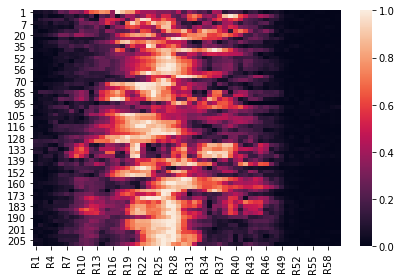

In [5]:
sns.heatmap(pd.DataFrame(X_test))
plt.tight_layout()

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[29  8]
 [ 7 18]]


C:\Users\Arindam Baisya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 257.44, 'Predicted label')

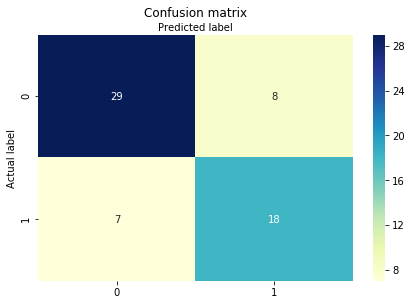

In [7]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Misclassification:", 1- metrics.accuracy_score(y_test, y_pred))
print("Sensitivity:",tp/tp+fn)
print("Specificity:",tn / (tn+fp))

Misclassification: 0.24193548387096775
Sensitivity: 8.0
Specificity: 0.7837837837837838


In [9]:
from AdvancedAnalytics import NeuralNetwork
from sklearn.neural_network import MLPClassifier

In [10]:
network_list = [(3), (11), (5,4), (6,5), (7,6), (8,7)]

In [17]:
for nn in network_list:
    fnn = MLPClassifier(hidden_layer_sizes=nn,solver="lbfgs",alpha=0, activation="relu", max_iter=1000, random_state=12345,tol=0.00000000001)
    fnn = fnn.fit(X_train, y_train)
    y_pred = fnn.predict(X_test)
    print("Network: ", nn, "Misclassification:", 1- metrics.accuracy_score(y_test, y_pred))
    print("Network: ", nn, "Sensitivity:",tp/tp+fn)
    print("Network: ", nn, "Specificity:",tn / (tn+fp), "/n")
    

Network:  3 Misclassification: 0.19354838709677424
Network:  3 Sensitivity: 8.0
Network:  3 Specificity: 0.7837837837837838 /n
Network:  11 Misclassification: 0.14516129032258063
Network:  11 Sensitivity: 8.0
Network:  11 Specificity: 0.7837837837837838 /n
Network:  (5, 4) Misclassification: 0.16129032258064513
Network:  (5, 4) Sensitivity: 8.0
Network:  (5, 4) Specificity: 0.7837837837837838 /n
Network:  (6, 5) Misclassification: 0.19354838709677424
Network:  (6, 5) Sensitivity: 8.0
Network:  (6, 5) Specificity: 0.7837837837837838 /n
Network:  (7, 6) Misclassification: 0.22580645161290325
Network:  (7, 6) Sensitivity: 8.0
Network:  (7, 6) Specificity: 0.7837837837837838 /n
Network:  (8, 7) Misclassification: 0.25806451612903225
Network:  (8, 7) Sensitivity: 8.0
Network:  (8, 7) Specificity: 0.7837837837837838 /n


We find the best result with Network size 11 with 2 hidden layers.

In [19]:
fnn = MLPClassifier(hidden_layer_sizes=(11),solver="lbfgs",alpha=0, activation="relu", max_iter=1000, random_state=12345,tol=0.00000000001)
fnn = fnn.fit(X_train, y_train)
y_pred = fnn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)


Text(0.5, 257.44, 'Predicted label')

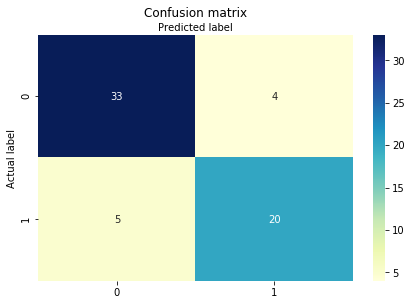

In [20]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We find the best result from the Network Size: 11 and hidden layer size: 2, with accuracy rate of 0.854